<link rel="stylesheet" href="../../styles/theme_style.css">
<!--link rel="stylesheet" href="../../styles/header_style.css"-->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<table width="100%">
    <tr>
        <td id="image_td" width="15%" class="header_image_color_6"><div id="image_img"
        class="header_image_6"></div></td>
        <td class="header_text"> EEG - Alpha Band Extraction </td>
    </tr>
</table>

<div id="flex-container">
    <div id="diff_level" class="flex-item">
        <strong>Difficulty Level:</strong>   <span class="fa fa-star checked"></span>
                                <span class="fa fa-star checked"></span>
                                <span class="fa fa-star"></span>
                                <span class="fa fa-star"></span>
                                <span class="fa fa-star"></span>
    </div>
    <div id="tag" class="flex-item-tag">
        <span id="tag_list">
            <table id="tag_list_table">
                <tr>
                    <td class="shield_left">Tags</td>
                    <td class="shield_right" id="tags">extract&#9729;eeg&#9729;alpha frequency band</td>
                </tr>
            </table>
        </span>
        <!-- [OR] Visit https://img.shields.io in order to create a tag badge-->
    </div>
</div>

<strong><span class="color2">Electroencephalogram (EEG)</span></strong>  acquired signals reflect the neuronal activity of specific brain areas. For each signal the magnitude of different frequency bands can be extracted, which vary when performing specific tasks. 



This <strong><span class="color4">Jupyter</span></strong> Notebook provides a simple example on how to extract the alpha frequency band as well as the alpha band power from an EEG acquisition. For further information on EEG frequency bands please refer to <a href="https://books.google.pt/books?id=e-Ex6VHd1UEC&pg=PA111&dq=alpha+8-12+Hz&hl=en&sa=X&ved=0ahUKEwi_1tj098LhAhWy34UKHRMeA2oQ6AEIKDAA#v=onepage&q=alpha%208-12%20Hz&f=false">Electroencephalography Freq. Bands <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>. 
The absolute value of alpha band power can be used inter alia to evaluate the state of eyes open or closed. It is measured by integrating the area of the power spectrum in the range of the alpha frequencies. The band power represents the magnitude of a specific frequency band. 



<strong><span class="color2">Alpha-band</span></strong> oscillations range in frequencies of 8-12 Hz and originate in the occipital lobe. Alpha waves are associated to a specific process and are mainly present when the eyes are closed and mainly blocked when the eyes are open. 

Read more detailed information on <a href="https://en.wikipedia.org/wiki/Electroencephalography#Wave_patterns">Alpha Waves <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>.

<hr>

<strong><span>1 - Importation of the needed packages</span></strong>

In [1]:
# Biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import loadtxt, array, mean, logical_and, trapz
from scipy.signal import spectrogram, welch

<strong><span>2 - Loading of acquired EEG data and proceed to Unit Conversion</span></strong> 
<br>For a detailed explanation on how to load the acquired EEG data as well as performing the Unit Conversion of the raw data, please refer to the notebooks <a href="../Load/open_txt_rev.php">Load acquired data from .txt file <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>,
<a href="../Load/signal_loading_preparatory_steps_rev.php">Signal Loading <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>
and <a href="../Pre-Process/unit_conversion_eeg_rev.php">EEG-Unit Conversion <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>

In [2]:
# Load Data from file path
data, header = bsnb.load_signal("eeg_sample_closed_open_eyes", get_header=True)

# [The acquired EEG data is at channel 1 ("CH1")]
eeg_data = data["CH1"]

<strong><span>2.1 - Store some acquisition constants inside variables</span></strong>
<br>Two extremely relevant parameters defined before data acquisition are the <i>sampling rate</i> and <i>ADC resolution</i>

In [3]:
sr = header["sampling rate"] # Sampling Rate
resolution = header["resolution"][0]

<strong><span>2.2 - Conversion of ADC sample values to physical units (uV) and generation of a time-axis</span></strong>
<br>The device used to acquire EEG data belongs to the "biosignalsplux" model, information that should be passed as an input of <strong>raw_to_phy</strong> function.

In [4]:
#Unit Conversion
signal_uv = bsnb.raw_to_phy("EEG", "biosignalsplux", eeg_data, resolution, "uV")
time_uv = bsnb.generate_time(signal_uv, sr)

<strong><span>2.3 -  Plotting the Raw Data</span></strong> 
<br>The following plot illustrates the raw eeg data for <strong><span class="color10">open</span></strong> and <strong><span class="color12">closed </span></strong> eyes:

In [5]:
bsnb.plot_eeg_signal_wind(time_uv, signal_uv, time_range=[58, 200], time_windows_evt_1=[(58, 89), (119, 149)], time_windows_evt_2=[(89, 119), (149, 179)], y_axis_label="Electric Voltage (uV)")

<strong><span>3 - Illustrating the change of magnitude of frequency bands with a Spectrogram</span></strong>
<br>The <strong><span class="color2"> Spectrogram</span></strong> illustrates the frequencies in time and the magnitude represented in different colours (see Fig. below).
The power of alpha frequencies increases (eyes closed) and decreases (eyes open) in specific time windows, which are indicated by vertical lines (<strong><span class="color10">opening of eyes</span></strong> and <strong><span class="color12">closing of eyes</span></strong>). This validates, that the alpha frequencies are mainly blocked when the test subject opens the eyes.

In [6]:
#Spectrogram function, using scipy.signal.spectrogram
f, t, Sxx = spectrogram(signal_uv, fs = sr, nfft = 2000)

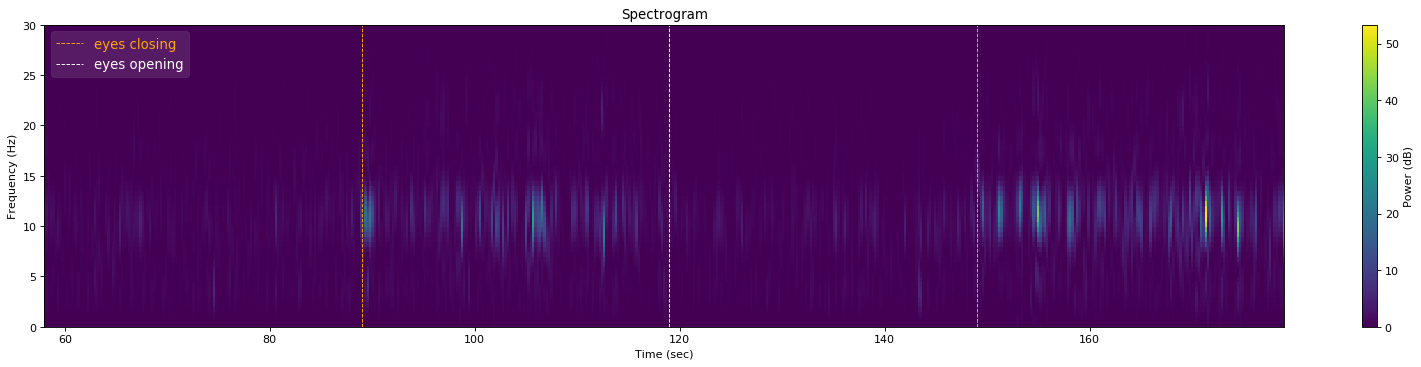

In [24]:
import matplotlib.pyplot as plt

#Plot of Spectrogram
plt.figure(num = None, figsize = (25, 5), dpi = 80, facecolor = 'w', edgecolor = 'k')    
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim(0,30)
plt.xlim(58,179)

#time legend for opening and closing of eyes 
xopen=[89,149]
xclose=[119]

#vertical lines to visualize opening and closing of eyes
plt.vlines(xopen,0,30, colors='orange', linestyles='dashed', label='eyes closing',linewidth=0.85)
plt.vlines(xclose,0,30, colors='w', linestyles='dashed', label='eyes opening',linewidth=0.85)

plt.title('Spectrogram')
plt.colorbar(label='Power (dB)')
leg=plt.legend(loc='upper left',framealpha=0.1,fontsize='large')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
plt.show()

<strong><span>4 - Filtering of the EEG data with a Baseline Shift and a Bandpass Filter </span></strong> 
<br>The signal is processed using a 2nd order Bandpass Filter with cutoff frequencies of 3 and 30 Hz to eliminate noise and artifacts as well as keeping the frequencies in the range of brain activity of awake adults. Furthermore a baseline shift is performed in order to remove the baseline noise. 
Please refer to the Notebook <a href="../Pre-Process/digital_filtering_rev.php">Digital Filtering <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a> for more information.


<strong><span>4.1 - Eyes Closed Segment </span></strong>

<strong><span>4.1.1 - Definition of the sample numbers where the window under analysis starts and ends </span></strong>

In [8]:
# Time window of closed eyes
t_closed_start = 149 # lower limit of time window (s)
sample_closed_start = t_closed_start*sr

t_closed_end = 179 # Upper limit of time window (s)
sample_closed_end = t_closed_end*sr

<strong><span>4.1.2 - Specification of cutoff frequencies that characterise the filtering system and preparation of the signal with baseline shift </span></strong>

In [9]:
# Cuttoff frequencies
f1 = 3 # lower cutoff frequency for bandpass filter (Hz)
f2 = 30 # Upper cutoff frequency for bandpass filter (Hz)

# Baseline shift of window
signal_shift_window_eyes_closed = array(signal_uv[sample_closed_start:sample_closed_end]) - mean(array(signal_uv[sample_closed_start:sample_closed_end]))

<strong><span>4.1.3 - Filtering EEG data on the time window under analysis </span></strong>

In [10]:
# Digital Bandpass filtering with cutoff frequencies of f1=3 and f2=30 Hz using bsns.bandpass
filtered_signal_closed_eyes = bsnb.bandpass(signal_shift_window_eyes_closed, f1, f2, order = 2, fs = sr)

<strong><span>4.2 - Eyes Opened Segment </span></strong>

<strong><span>4.2.1 - Definition of the sample numbers where the window under analysis starts and ends </span></strong>

In [11]:
# Time window of opened eyes
t_opened_start = 119 # lower limit of time window (s)
sample_opened_start = t_opened_start*sr

t_opened_end = 149 # Upper limit of time window (s)
sample_opened_end = t_opened_end*sr

<strong><span>4.2.2 - Preparation of the signal with baseline shift </span></strong>

In [12]:
#Baseline shift of window
signal_shift_window_eyes_opened = array(signal_uv[sample_opened_start:sample_opened_end])-mean(array(signal_uv[sample_opened_start:sample_opened_end]))

#Digital Bandpass filtering with cutoff frequencies of f1=3 and f2=30 Hz using bsns.bandpass
filtered_signal_opened_eyes = bsnb.bandpass(signal_shift_window_eyes_opened, f1, f2, order = 2, fs = sr)

<strong><span >5 - Generation of Power Spectrum by Fast Fourier Transform (FFT) and Welchs Method</span></strong> 
<br>In order to estimate the spectral density of the alpha band and to compute the average bandpower, the <strong><span>FFT</span></strong>  is applied to the filtered signal for several time windows by <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html">Welchs method <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>.
<br>For more information on FFT please refer to the Notebook <a href="../Pre-Process/digital_filtering_rev.php">Digital Filtering <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>.

<strong>A - Eyes Closed Segment</strong>

In [13]:
#Time Windows for Welchs method 
win = 4 * sr # 4 seconds time windows.

#FFT with time windows using scipy.signal.welch
freq_axis_eyes_closed, power_spect_eyes_closed = welch(filtered_signal_closed_eyes, sr, nperseg=win)

<strong>B - Eyes Opened Segment</strong>

In [14]:
#FFT with time windows using scipy.signal.welch for open eyes time window
freq_axis_eyes_opened, power_spect_eyes_opened = welch(filtered_signal_opened_eyes, sr, nperseg=win)

<strong><span> 5.1 - Defining the Alpha Frequency Band:</span></strong>
<br>In case the Extraction of Band Power is performed for other Frequency bands, please change <span class="color7"><strong>low (freq_low)</strong></span> and <span class="color8"><strong>high  (freq_high)</strong></span> frequencies accordingly
(Theta: 4-8 Hz, Beta: 13-30 Hz) <a href="https://books.google.pt/books?id=e-Ex6VHd1UEC&pg=PA111&dq=alpha+8-12+Hz&hl=en&sa=X&ved=0ahUKEwi_1tj098LhAhWy34UKHRMeA2oQ6AEIKDAA#v=onepage&q=alpha%208-12%20Hz&f=false">Electroencephalography Freq. Bands <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>!

In [15]:
#Define Frequency Band limits:
freq_low = 8 #lower limit for alpha band
freq_high = 12 #Upper limit for alpha band 

In [16]:
#Find the intersection Values of the alpha band in the frequency vector [Eyes Closed]
idx_alpha_eyes_closed = logical_and(freq_axis_eyes_closed >= freq_low, freq_axis_eyes_closed <= freq_high)

#Find the intersection Values of the alpha band in the frequency vector [Eyes Opened]
idx_alpha_eyes_opened = logical_and(freq_axis_eyes_opened >= freq_low, freq_axis_eyes_opened <= freq_high)

<strong><span> 5.2 - Plotting the Power Spectrum:</span></strong>

In [17]:
bsnb.plot_eeg_alpha_band(freq_axis_eyes_opened, power_spect_eyes_opened, freq_axis_eyes_closed, power_spect_eyes_closed, freq_range=[3, 32])

As it can be seen in the Power spectrum of eyes open and closed, the alpha band power is blocked in the case of eyes open (right).

<strong><span>6 - Extraction of Alpha Band Power from the Power Spectrum</span></strong>
<br>The absolute alpha band power is calculated for a specific time window (closed eyes) by approximating the area under the curve using the integration method <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">composite trapezoidal rule <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>:



<strong>A - Eyes Closed Segment</strong>

In [18]:
#Frequency Resolution
freq_res_closed_eyes = freq_axis_eyes_closed[1] - freq_axis_eyes_closed[0] 

#Compute the Absolute Power with numpy.trapz:
alpha_power_closed_eyes = trapz(power_spect_eyes_closed[idx_alpha_eyes_closed],dx=freq_res_closed_eyes)

<strong>B - Eyes Opened Segment</strong>

In [19]:
#Frequency Resolution
freq_res_opened_eyes = freq_axis_eyes_opened[1] - freq_axis_eyes_opened[0] 

#Compute the Absolute Power with numpy.trapz:
alpha_power_opened_eyes = trapz(power_spect_eyes_opened[idx_alpha_eyes_opened],dx=freq_res_opened_eyes)

In [20]:
# --> Hide In

from sty import fg, rs
print(fg(98,195,238) +  "\033[1mAbsolute Alpha Power: \033[0m" + fg.rs + '[Closed eyes]', str(round(alpha_power_closed_eyes,2)), 'uV^2', 'and [Opened eyes]',str(round(alpha_power_opened_eyes,2)), 'uV^2')

Absolute Alpha Power: [Closed eyes] 28.3 uV^2 and [Opened eyes] 4.83 uV^2


The state of eyes in terms of open or closed can be identified by using the FFT and either examining the spectrogram or the alpha band power. A high alpha band power represents the condition of eyes closed and a low alpha band power the condition of eyes open due to the alpha blockage. In this example the absolute alpha band power of eyes closed with a value of about 28 $uV^2$ result in a high value and with open eyes and a value of about 5 $uV^2$ a low value.

<strong><span class="color7">We hope that you have enjoyed this guide. </span><span class="color2">biosignalsnotebooks</span><span class="color4"> is an environment in continuous expansion, so don't stop your journey and learn more with the remaining <a href="../MainFiles/biosignalsnotebooks.ipynb">Notebooks <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a></span></strong> ! 

<span class="color6">**Auxiliary Code Segment (should not be replicated by
the user)**</span>

In [21]:
from biosignalsnotebooks.__notebook_support__ import css_style_apply
css_style_apply()

.................... CSS Style Applied to Jupyter Notebook .........................


In [22]:
from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([16])")

<IPython.core.display.Javascript object>

In [23]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'],
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>